In [2]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
% matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Load in the dataframe
df = pd.read_csv("drive/My Drive/Colab Notebooks/dataset_tweet_sentimen_tayangan_tv.csv", index_col=0)
df.head()

,Sentiment,Acara TV,Jumlah Retweet,Text Tweet
Id,,,,
1,positive,HitamPutihTransTV,12,"Undang @N_ShaniJKT48 ke hitamputih, pemenang S..."
2,positive,HitamPutihTransTV,6,Selamat berbuka puasa Semoga amal ibadah hari ...
3,positive,HitamPutihTransTV,9,"Ada nih di trans7 hitam putih, dia dpt penghar..."
4,positive,HitamPutihTransTV,2,selamat ya mas @adietaufan masuk hitamputih
5,positive,HitamPutihTransTV,1,Asiknya nonton Hitam Putih Trans7


In [5]:
print("There are {} observations and {} features in this dataset. \n".format(df.shape[0],df.shape[1]))

print("There are {} sentimen comment in this dataset such as {}... \n".format(len(df.Sentiment.unique()),
                                                                                      ", ".join(df.Sentiment.unique()[0:2])))

There are 400 observations and 4 features in this dataset. 

There are 2 sentimen comment in this dataset such as positive, negative... 



In [6]:
df.rename(columns={'Text Tweet': 'Comment'}, inplace=True)
df.head()

,Sentiment,Acara TV,Jumlah Retweet,Comment
Id,,,,
1,positive,HitamPutihTransTV,12,"Undang @N_ShaniJKT48 ke hitamputih, pemenang S..."
2,positive,HitamPutihTransTV,6,Selamat berbuka puasa Semoga amal ibadah hari ...
3,positive,HitamPutihTransTV,9,"Ada nih di trans7 hitam putih, dia dpt penghar..."
4,positive,HitamPutihTransTV,2,selamat ya mas @adietaufan masuk hitamputih
5,positive,HitamPutihTransTV,1,Asiknya nonton Hitam Putih Trans7


In [7]:
df.describe().head()

,Jumlah Retweet
count,400.000000
mean,3.582500
std,4.875204
min,0.000000
25%,0.000000


Undang @N_ShaniJKT48 ke hitamputih, pemenang SSK JKT48 harusnya mJKT48 ini lebih Layak di Undang karena prestasinya


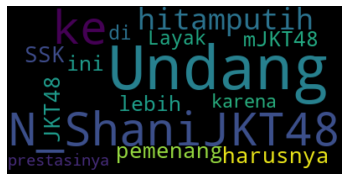

In [8]:
# Start with one review:
text = df.Comment[1]
print(text)
# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

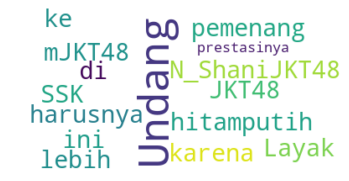

In [9]:
# lower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [10]:
# Save the image in the img folder:
wordcloud.to_file("first_review.png")

In [11]:
text = " ".join(review for review in df.Comment)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 32356 words in the combination of all review.


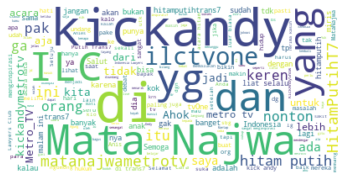

In [12]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["negative", "positive"])

# # Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# # Display the generated image:
# # the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [13]:
insta_mask = np.array(Image.open("drive/My Drive/Colab Notebooks/mask.png"))
insta_mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [14]:
def transform_format(val):
    if val == 0:
        return 255
    else:
        return val

In [15]:
# Transform your mask into a new one that will work with the function:
transformed_insta_mask = np.ndarray((insta_mask.shape[0],insta_mask.shape[1]), np.int32)

for i in range(len(insta_mask)):
    transformed_insta_mask[i] = list(map(transform_format, insta_mask[i]))

In [16]:
# Check the expected result of your mask
transformed_insta_mask

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=int32)

In [17]:
transformed_insta_mask.shape

(512, 512)

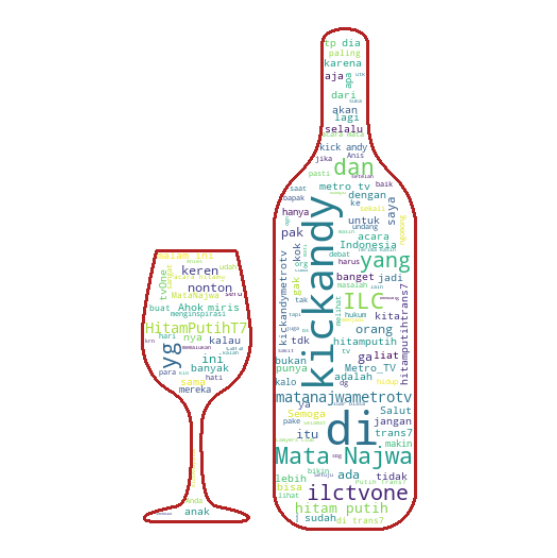

In [21]:
# Create a word cloud image
wc = WordCloud(background_color="white", max_words=1000, mask=transformed_insta_mask,
               stopwords=stopwords, contour_width=3, contour_color='firebrick')

# Generate a wordcloud
wc.generate(text)

# store to file
wc.to_file("tweet.png")

# show
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [19]:
# Join all reviews of each Sentiment:
negative = " ".join(review for review in df[df["Sentiment"]=="negative"].Comment)
positive = " ".join(review for review in df[df["Sentiment"]=="positive"].Comment)

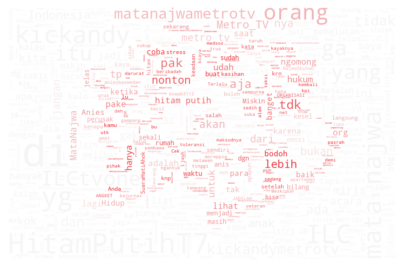

In [22]:
# Generate a word cloud image
mask = np.array(Image.open("drive/My Drive/Colab Notebooks/bad.png"))
wordcloud_usa = WordCloud(stopwords=stopwords, background_color="white", mode="RGBA", max_words=1000, mask=mask).generate(negative)

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[7,7])
plt.imshow(wordcloud_usa.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

# store to file
plt.savefig("negative_comment.png", format="png")

plt.show()

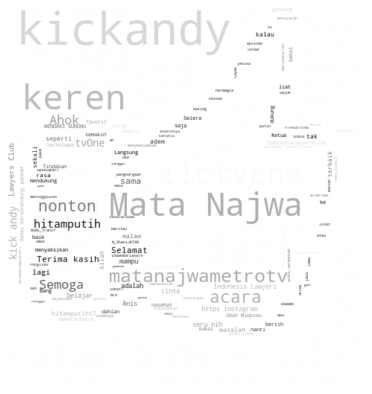

In [23]:
# Generate a word cloud image
mask = np.array(Image.open("drive/My Drive/Colab Notebooks/good.jpg"))
wordcloud_fra = WordCloud(stopwords=stopwords, background_color="white", mode="RGBA", max_words=1000, mask=mask).generate(positive)

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[7,7])
plt.imshow(wordcloud_fra.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

# store to file
plt.savefig("positive_commment.png", format="png")

#plt.show()